In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

C:\Users\daudk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
import pandas as pd

#saldo_df = pd.read_csv('SaldoTrx.csv')
#saldo_df = pd.read_csv('SaldoTrxByGroup.csv')
saldo_df = pd.read_csv('ReplenishTrx.csv')

X = saldo_df[["Longitude", "Latitude"]] 

print(X)

         Longitude  Latitude
0       106.821869 -6.185247
1       106.821254 -6.184443
2       106.725373 -6.186897
3       106.733907 -6.175389
4       106.733991 -6.188427
...            ...       ...
153959  106.778925 -6.347138
153960  106.764524 -6.270668
153961  106.722207 -6.311363
153962  106.770741 -6.311069
153963  106.755341 -6.304280

[153964 rows x 2 columns]


In [16]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

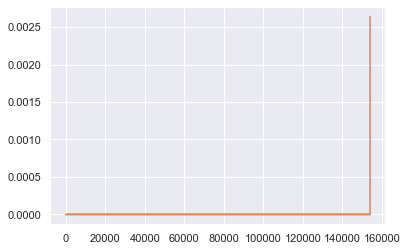

In [17]:
distances = np.sort(distances, axis=0)
 
plt.plot(distances)

In [ ]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)
clusters = m.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))